In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [3]:
from musicalrobot import edge_detection as ed

In [4]:
frames = ed.input_file('10_17_19_DDA_shallow_plate.tiff')

In [5]:
len(frames)

320

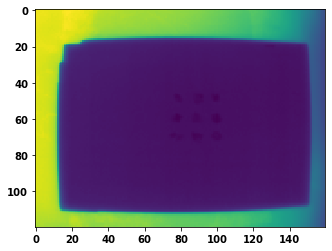

In [6]:
plt.imshow(frames[0])

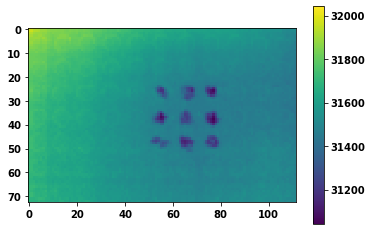

In [7]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[22:95,23:135])
plt.imshow(crop_frame[50])
plt.colorbar()
plt.show()

In [8]:
flip_frames = ed.flip_frame(crop_frame)

In [9]:
labeled_samples = ed.edge_detection(flip_frames,9)

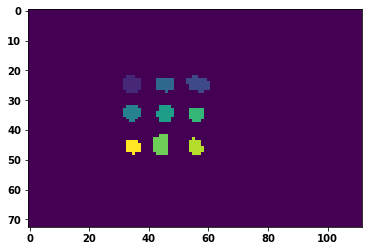

In [10]:
plt.imshow(labeled_samples)

In [11]:
regprops = ed.regprop(labeled_samples, flip_frames, 3, 3)

In [12]:
sorted_regprops = ed.sort_regprops(regprops, 3, 3)
sorted_regprops[1]

,Row,Column,Plate_temp(cK),Radius,Plate_coord,Area,Perim,Sample_temp(cK)
unique_index,,,,,,,,
93.0,24.0,34.0,31279.0,3.141275,40.141275,31.0,17.656854,31143.0
45.0,34.0,34.0,31262.0,2.985411,39.985411,28.0,16.485281,30987.0
14.0,45.0,34.0,31259.0,2.523133,39.523133,20.0,14.242641,31046.0
55.0,24.0,45.0,31282.0,2.820948,50.820948,25.0,16.828427,31096.0
17.0,34.0,45.0,31301.0,3.038254,51.038254,29.0,17.656854,31111.0
65.0,45.0,44.0,31277.0,3.191538,50.191538,32.0,18.828427,31162.0
75.0,24.0,56.0,31303.0,3.241022,62.241022,33.0,20.485281,31197.0
28.0,34.0,56.0,31290.0,2.705758,61.705758,23.0,14.828427,31017.0
43.0,45.0,55.0,31316.0,2.646284,60.646284,22.0,15.071068,31106.0


In [13]:
temp, plate_temp = ed.sample_temp(regprops, flip_frames)

In [14]:
frame_number = np.linspace(1, len(temp[0]), len(temp[0]))

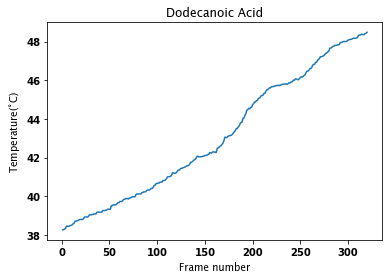

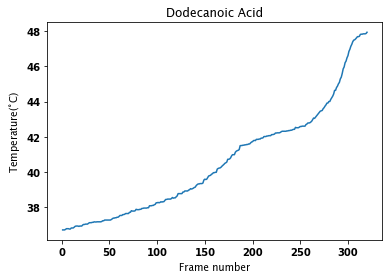

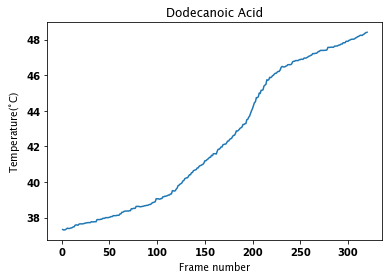

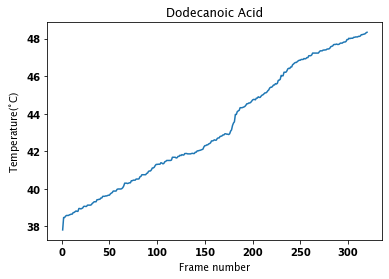

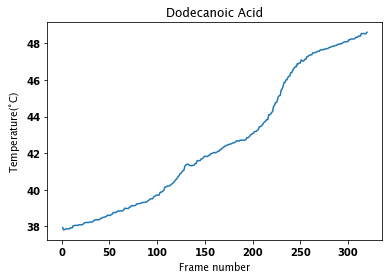

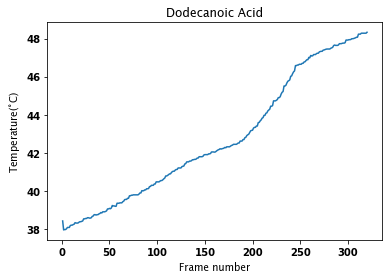

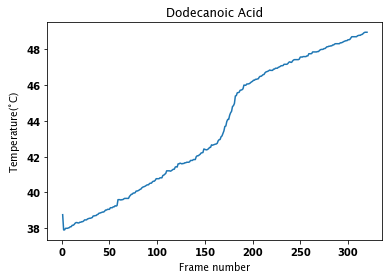

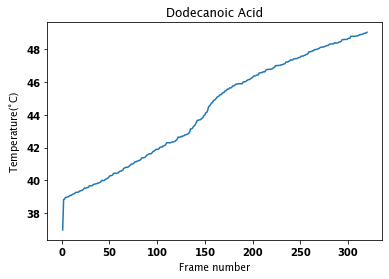

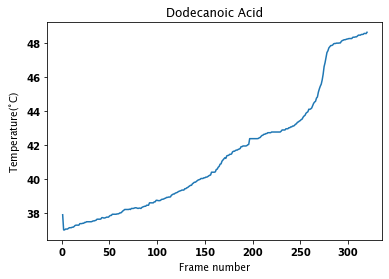

In [15]:
csfont = {'fontname':'Lucida Sans Unicode'}
hfont = {'fontname':'Lucida Sans Unicode'}
for i in range(len(temp)):
    plt.plot(frame_number, temp[i])
    plt.title('Dodecanoic Acid',**csfont)
    plt.xlabel('Frame number',**hfont)
    plt.ylabel('Temperature($^{\circ}$C)',**hfont)
#     plt.savefig('../temp_profiles/dodecanoic_acid_'+ str(i+1)+ '.png')
    plt.show()

In [15]:
s_peaks, s_infl = ed.peak_detection(temp)
p_peaks, p_infl = ed.peak_detection(plate_temp)
inf_temp = ed.inflection_point(temp, plate_temp ,s_peaks, p_peaks)

In [16]:
print(inf_temp)

[43.05, 45.97, 44.5, 43.96, 45.65, 45.51, 45.41, 44.55, 46.84]


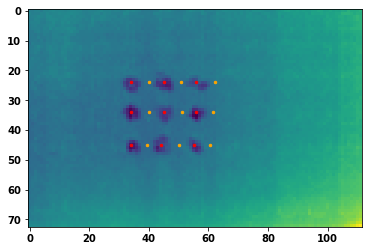

In [17]:
plt.imshow(flip_frames[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')
# plt.title('Sample centroid and plate locations at which the temperature is monitored')

In [18]:
# Using the wrapping function
flip_frames, sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frame, 3, 3)